#### Task 1: Import data into data frame

In [1]:
import pandas as pd
import numpy as np

origin_df = pd.read_csv("diemthi2019.csv", dtype = {'sbd' : 'string'})
df = origin_df
print(df['sbd'].dtype)
df.head(2)

string


,Unnamed: 0,Dia,GDCD,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Su,Toan,Van,sbd
0,0,7.75,8.75,NaN,NaN,N1,7.6,NaN,8.25,8.2,8.00,24008611
1,1,NaN,NaN,4.5,8.25,N1,8.0,6.0,NaN,8.6,6.17,51000032


#### Task 2: Data cleaning and some summary calculations related to Ngoai_ngu

##### 2.1: Remove the first column

In [2]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,Dia,GDCD,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Su,Toan,Van,sbd
0,7.75,8.75,NaN,NaN,N1,7.6,NaN,8.25,8.2,8.00,24008611
1,NaN,NaN,4.5,8.25,N1,8.0,6.00,NaN,8.6,6.17,51000032
2,4.25,5.75,NaN,NaN,NaN,NaN,NaN,4.00,5.2,4.75,51000005
3,4.75,5.00,NaN,NaN,NaN,NaN,NaN,2.25,4.4,4.50,51000021
4,8.25,7.50,NaN,NaN,N1,4.4,NaN,7.75,5.8,6.00,51000013
...,...,...,...,...,...,...,...,...,...,...,...
811846,5.75,8.50,NaN,NaN,N1,3.4,NaN,4.50,4.4,4.75,26019104
811847,NaN,NaN,4.5,3.75,N1,4.4,4.00,NaN,5.2,6.25,26019102
811848,5.50,8.00,NaN,NaN,N1,2.8,NaN,5.50,2.8,5.00,26019099
811849,6.75,8.50,NaN,NaN,N1,4.0,NaN,3.50,6.2,7.25,26019101


##### 2.2: Set data type to float, handle NaN values

In [3]:

# Convert columns to float, handling errors using pd.to_numeric
df['Dia'] = pd.to_numeric(df['Dia'], errors='coerce')
df['GDCD'] = pd.to_numeric(df['GDCD'], errors='coerce')
df['Hoa'] = pd.to_numeric(df['Hoa'], errors='coerce')
df['Li'] = pd.to_numeric(df['Li'], errors='coerce')
df['Ngoai_ngu'] = pd.to_numeric(df['Ngoai_ngu'], errors='coerce')
df['Sinh'] = pd.to_numeric(df['Sinh'], errors='coerce')
df['Su'] = pd.to_numeric(df['Su'], errors='coerce')
df['Toan'] = pd.to_numeric(df['Toan'], errors='coerce')
df['Van'] = pd.to_numeric(df['Van'], errors='coerce')

# Convert 'Ma_mon_ngoai_ngu' and 'sbd' to string
df['Ma_mon_ngoai_ngu'] = df['Ma_mon_ngoai_ngu'].astype('string')


df.round(2)
df.head(2)

,Dia,GDCD,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Su,Toan,Van,sbd
0,7.75,8.75,NaN,NaN,N1,7.6,NaN,8.25,8.2,8.00,24008611
1,NaN,NaN,4.5,8.25,N1,8.0,6.0,NaN,8.6,6.17,51000032


##### 2.3: Adding new column "To hop thi"

In [4]:
df.loc[(df['Dia'].isnull() & df['Su'].isnull() & df['GDCD'].isnull()), 'To hop thi'] = 'Tu nhien'
df.loc[(df['Li'].isnull() & df['Sinh'].isnull() & df['Hoa'].isnull()), 'To hop thi'] = 'Xa hoi'
#df['To hop thi'].fillna('UnKnown', inplace = True)

df


,Dia,GDCD,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Su,Toan,Van,sbd,To hop thi
0,7.75,8.75,NaN,NaN,N1,7.6,NaN,8.25,8.2,8.00,24008611,Xa hoi
1,NaN,NaN,4.5,8.25,N1,8.0,6.00,NaN,8.6,6.17,51000032,Tu nhien
2,4.25,5.75,NaN,NaN,<NA>,NaN,NaN,4.00,5.2,4.75,51000005,Xa hoi
3,4.75,5.00,NaN,NaN,<NA>,NaN,NaN,2.25,4.4,4.50,51000021,Xa hoi
4,8.25,7.50,NaN,NaN,N1,4.4,NaN,7.75,5.8,6.00,51000013,Xa hoi
...,...,...,...,...,...,...,...,...,...,...,...,...
811846,5.75,8.50,NaN,NaN,N1,3.4,NaN,4.50,4.4,4.75,26019104,Xa hoi
811847,NaN,NaN,4.5,3.75,N1,4.4,4.00,NaN,5.2,6.25,26019102,Tu nhien
811848,5.50,8.00,NaN,NaN,N1,2.8,NaN,5.50,2.8,5.00,26019099,Xa hoi
811849,6.75,8.50,NaN,NaN,N1,4.0,NaN,3.50,6.2,7.25,26019101,Xa hoi


##### 2.3: Handle column "Ma_mon_ngoai_ngu" and "Ngoai_ngu"

In [5]:
import matplotlib.pyplot as plt
languages = df['Ma_mon_ngoai_ngu'].unique()
print(languages)
df_grouped = df.groupby('Ma_mon_ngoai_ngu').agg(
    So_thi_sinh = ('sbd', 'count'),
    Diem_trung_binh = ('Ngoai_ngu', 'mean'),
).reset_index()

df_grouped.round(2)
df_grouped




<StringArray>
['N1', <NA>, 'N4', 'N6', 'N3', 'N5', 'N2']
Length: 7, dtype: string


,Ma_mon_ngoai_ngu,So_thi_sinh,Diem_trung_binh
0,N1,726064,4.234018
1,N2,148,7.581081
2,N3,646,7.489783
3,N4,801,5.221223
4,N5,81,7.197531
5,N6,773,5.828202


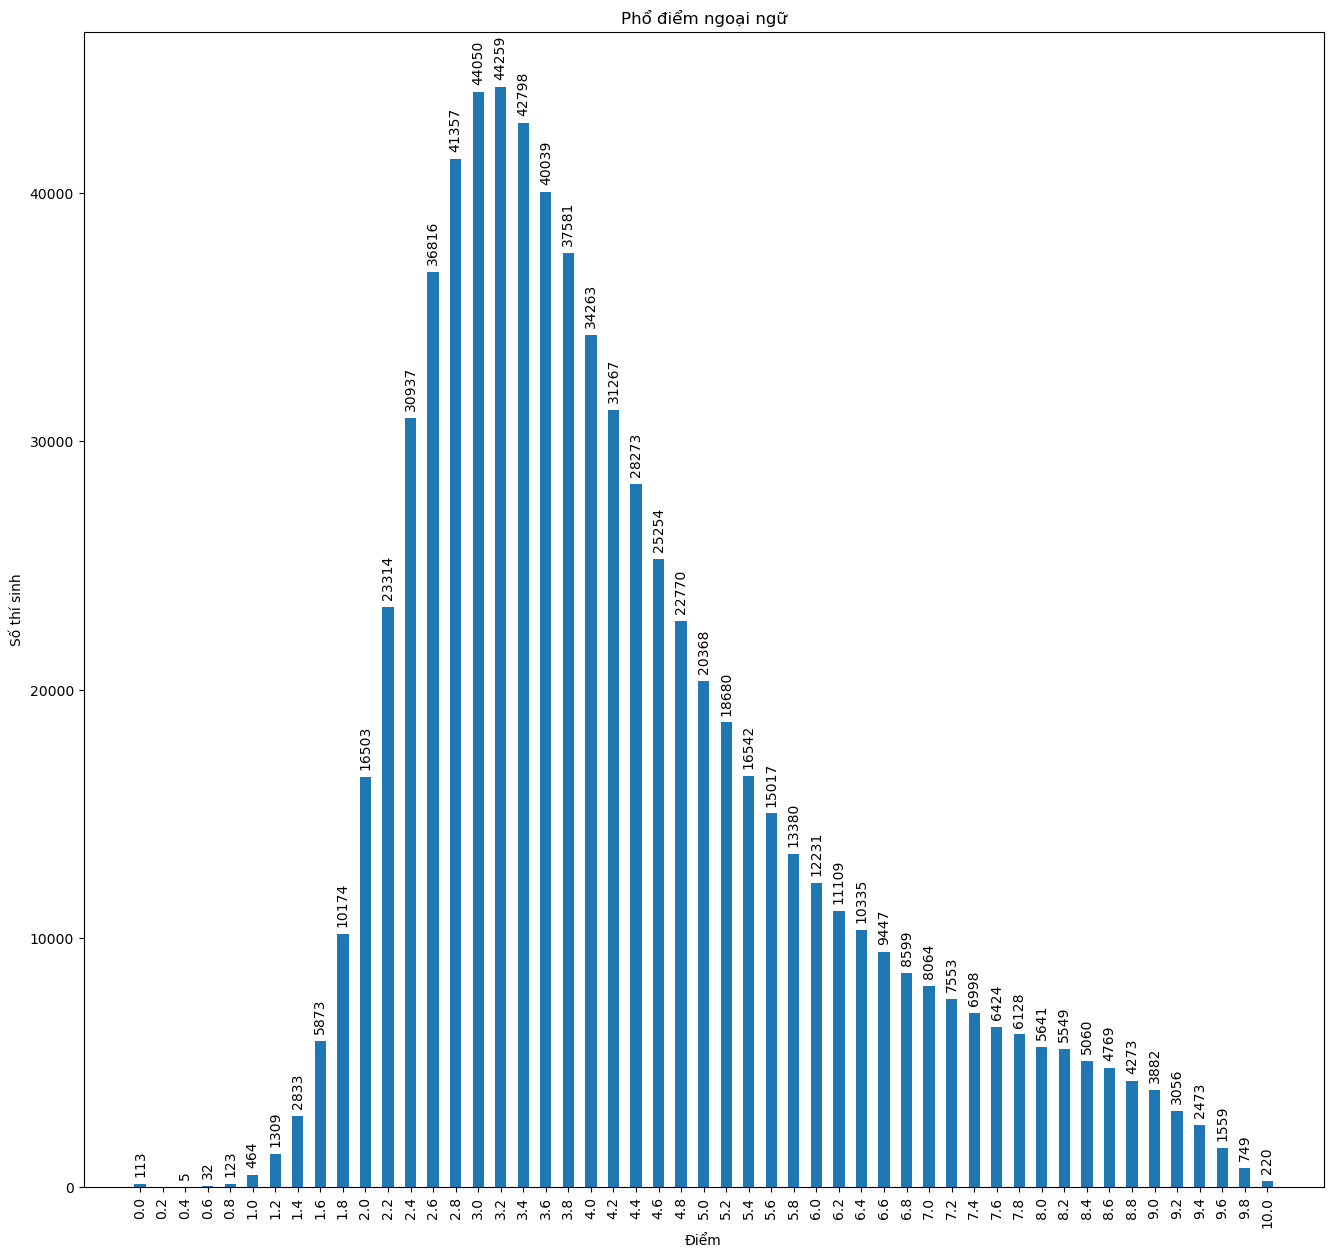

In [6]:
df_languages = df.groupby('Ngoai_ngu').agg(
    So_thi_sinh = ('sbd', 'count')
).reset_index()

plt.figure(figsize = (16, 15))

bars = plt.bar(df_languages['Ngoai_ngu'], df_languages['So_thi_sinh'], width = 0.1)

plt.title('Phổ điểm ngoại ngữ')
plt.xlabel('Điểm')
plt.ylabel('Số thí sinh')



plt.xlim(-0.5, 10.5)
plt.xticks(np.arange(0, 10.2, 0.2))
plt.xticks(rotation = 90)

for bar in bars:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width() / 2
    plt.text(x_value, y_value + 300, int(y_value), ha = 'center', va = 'bottom', rotation = 90)

plt.show()


##### 2.3.1: Môn thi tiếng Anh

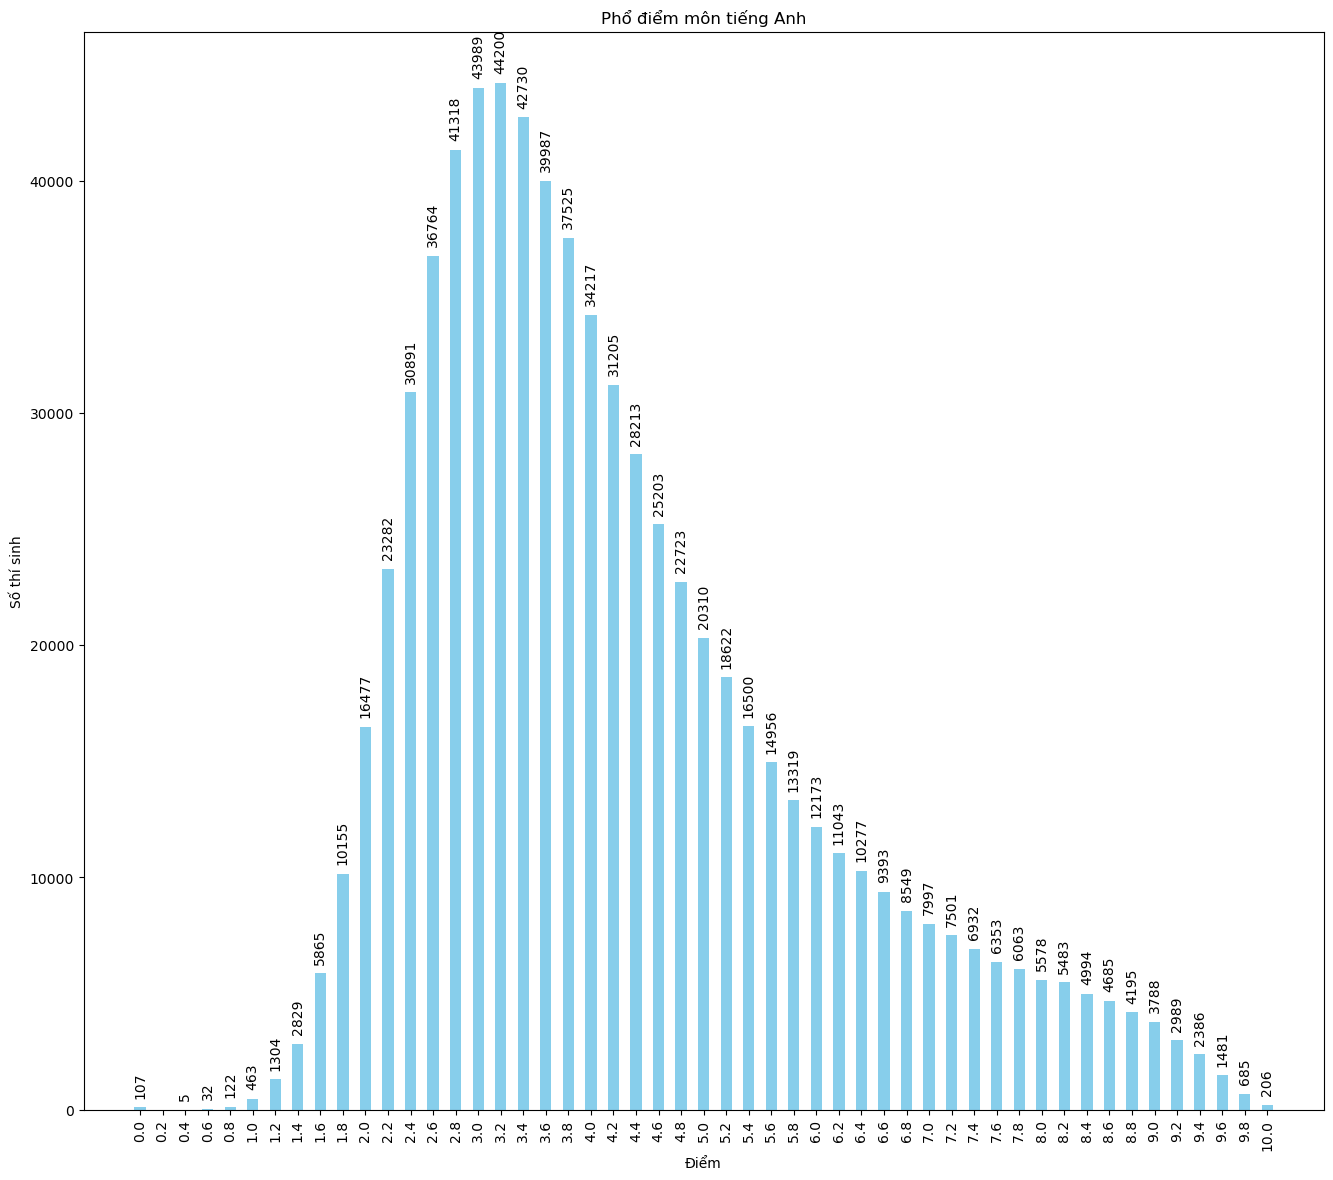

,Ngoai_ngu,So_hoc_sinh
0,0.0,107
1,0.4,5


In [7]:
df_Tieng_Anh = df[df['Ma_mon_ngoai_ngu'] == 'N1']
df_Tieng_Anh = df_Tieng_Anh.groupby('Ngoai_ngu').agg(
    So_hoc_sinh = ('sbd', 'count')
).reset_index()

plt.figure(figsize=(16, 14))

bars = plt.bar(df_Tieng_Anh['Ngoai_ngu'], df_Tieng_Anh['So_hoc_sinh'], color='skyblue', width=0.1)

plt.title("Phổ điểm môn tiếng Anh")
plt.xlabel('Điểm')
plt.xticks(rotation=90)
plt.ylabel('Số thí sinh')

plt.xlim(-0.5, 10.5)
plt.xticks(np.arange(0, 10.2, 0.2))

# Place value of each bar on top of it
# Reference: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
for bar in bars:
    yval = bar.get_height()
    plt.text((bar.get_x() + bar.get_width()/2), yval + 400, int(yval), ha='center', va='bottom', rotation=90)

plt.show()
df_Tieng_Anh.head(2)

##### 2.3.2: Môn thi tiếng Nga

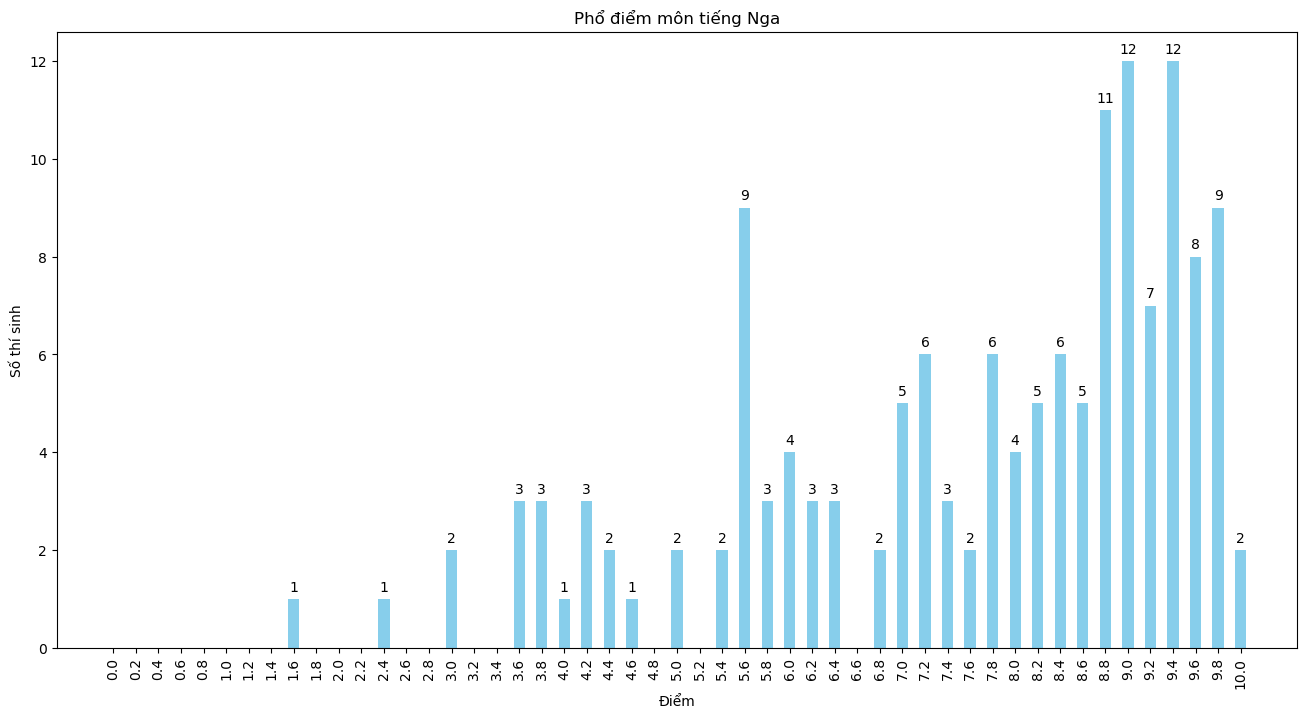

In [8]:
df_Tieng_Nga = df[df['Ma_mon_ngoai_ngu'] == 'N2']
df_Tieng_Nga = df_Tieng_Nga.groupby('Ngoai_ngu').agg(
    So_hoc_sinh = ('sbd', 'count')
).reset_index()
plt.figure(figsize=(16, 8))
bars = plt.bar(df_Tieng_Nga['Ngoai_ngu'], df_Tieng_Nga['So_hoc_sinh'], color='skyblue', width=0.1)
plt.title("Phổ điểm môn tiếng Nga")
plt.xlabel('Điểm')
plt.xticks(rotation=90)
plt.ylabel('Số thí sinh')

plt.xlim(-0.5, 10.5)
plt.xticks(np.arange(0, 10.2, 0.2))

# Place value of each bar on top of it
# Reference: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
for bar in bars:
    yval = bar.get_height()
    plt.text((bar.get_x() + bar.get_width()/2), yval + 0.1, int(yval), ha='center', va='bottom', rotation= 0)

plt.show()

#### 2.4: Graph illustration for 'Toan' an 'Li'

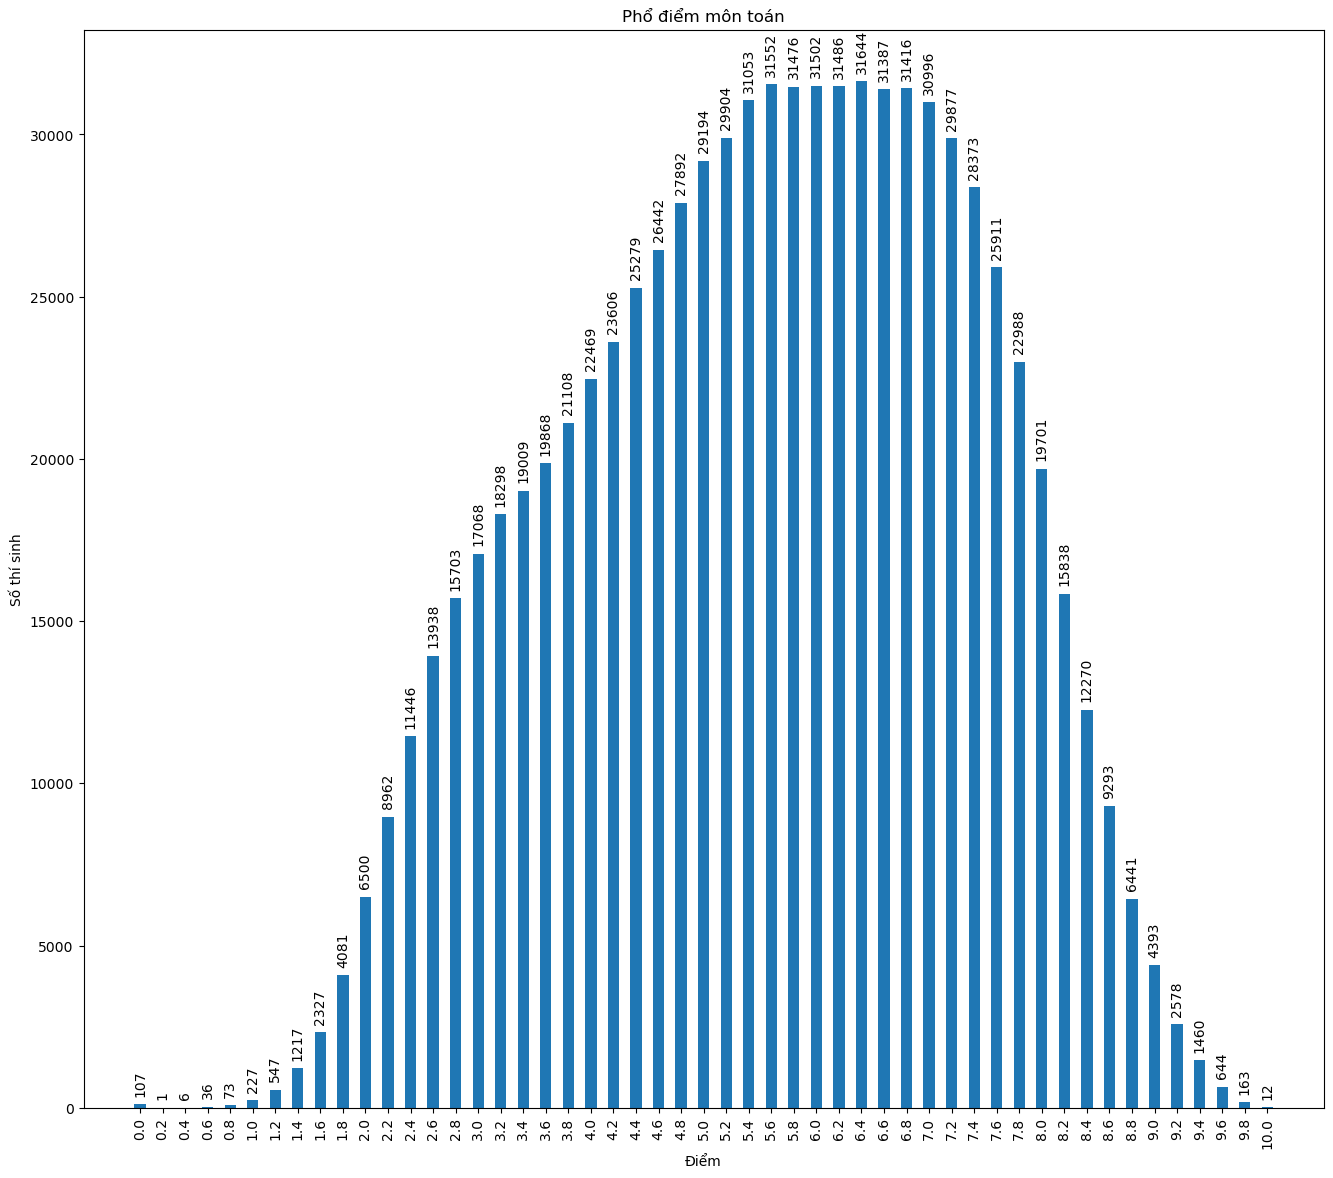

In [9]:
df_Toan = df[~df['Toan'].isnull()]
df_Toan = df_Toan.groupby('Toan').agg(
    So_thi_sinh = ('Toan', 'count'),
).reset_index()

plt.figure(figsize = (16, 14))

bars = plt.bar(df_Toan['Toan'], df_Toan['So_thi_sinh'], width = 0.1)

plt.title('Phổ điểm môn toán')
plt.xlabel('Điểm')
plt.ylabel('Số thí sinh')

plt.xlim(-0.5, 10.5)
plt.xticks(rotation = 90)
plt.xticks(np.arange(0, 10.2, 0.2))

for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval + 250, int(yval), ha = 'center', va = 'bottom', rotation = 90)
plt.show()


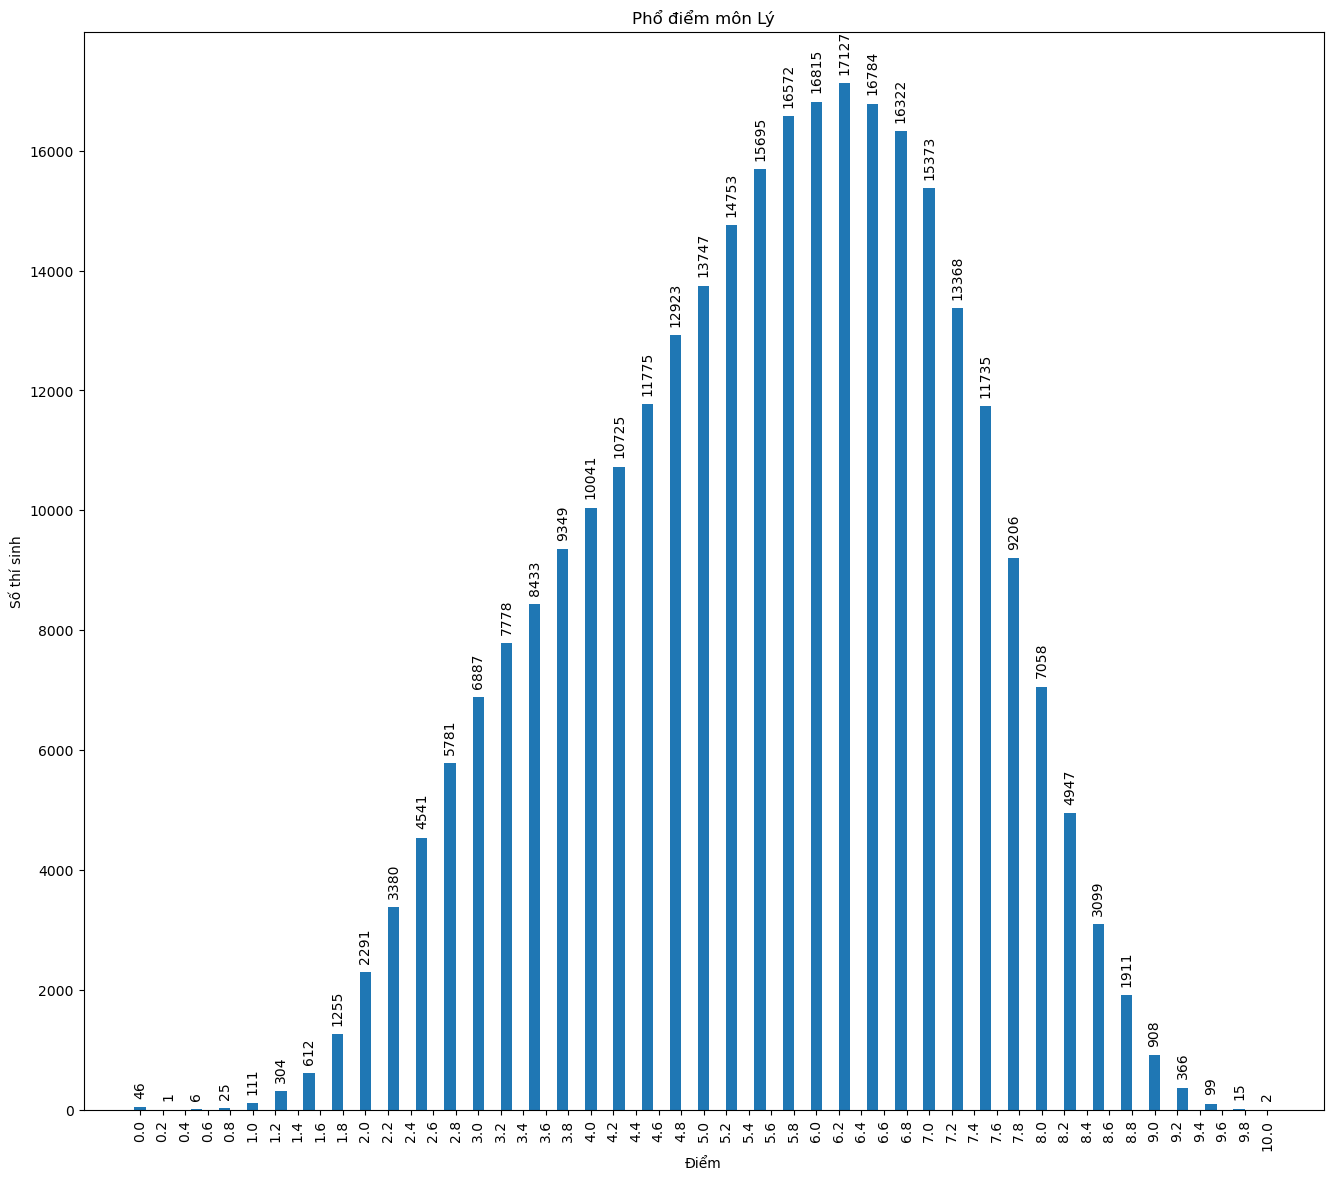

In [10]:
df_Ly = df[~df['Li'].isnull()]
df_Ly = df_Ly.groupby('Li').agg(
    So_thi_sinh = ('Li', 'count'),
).reset_index()

plt.figure(figsize = (16, 14))

bars = plt.bar(df_Ly['Li'], df_Ly['So_thi_sinh'], width = 0.1)

plt.title('Phổ điểm môn Lý')
plt.xlabel('Điểm')
plt.ylabel('Số thí sinh')

plt.xlim(-0.5, 10.5)
plt.xticks(rotation = 90)
plt.xticks(np.arange(0, 10.2, 0.2))

for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval + 150, int(yval), ha = 'center', va = 'bottom', rotation = 90)
plt.show()

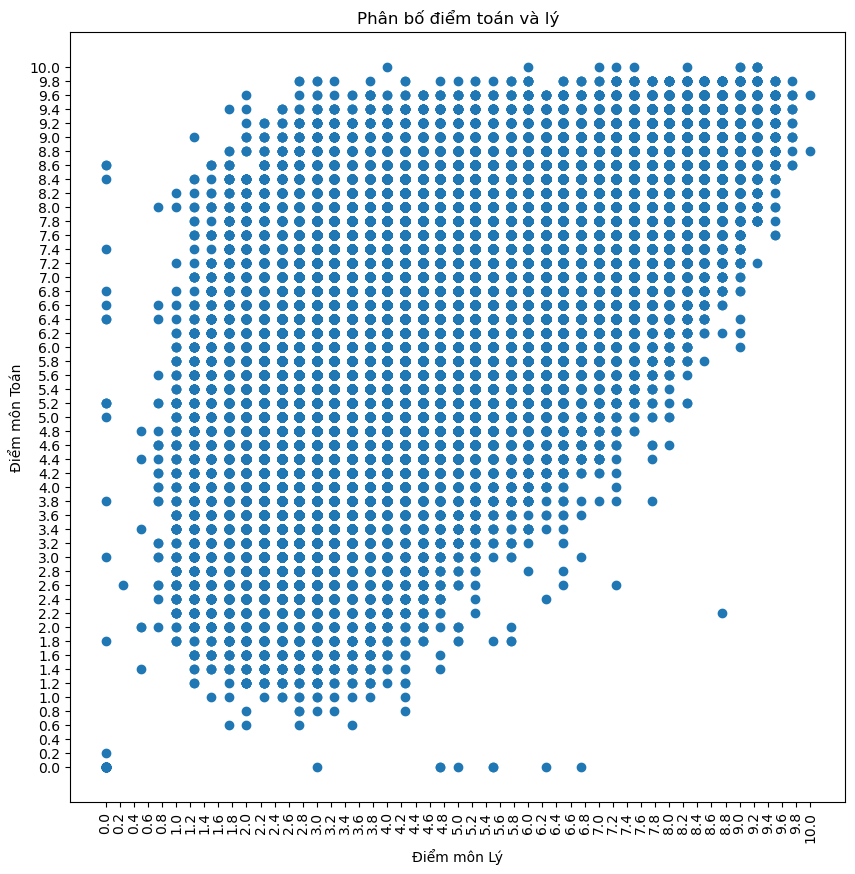

In [11]:
df_Toan_ly = df[(~df['Toan'].isnull() & ~df['Li'].isnull())]
toan = df_Toan_ly['Toan']
ly = df_Toan_ly['Li']

ti_le_ly_hon_toan = (df_Toan_ly['Li'] > df_Toan)

plt.figure(figsize = (10, 10))

plt.scatter(ly, toan)
plt.title("Phân bố điểm toán và lý")
plt.xlabel("Điểm môn Lý")
plt.ylabel("Điểm môn Toán")

plt.xticks(np.arange(0, 10.2, 0.2))
plt.yticks(np.arange(0, 10.2, 0.2))

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)


plt.show()



#### 2.5: Chứng minh học sinh giỏi toán thì giỏi lý

In [17]:

# tinh toan diem ly tuong ung voi diem toan da chon
df_Toan = df[~df['Toan'].isnull()]

# Group by 'Toan' and calculate the required statistics
df_grouped = df_Toan.groupby('Toan').agg(
    Diem_Ly_trung_binh=('Li', 'mean'),
    Diem_Ly__cao_nhat=('Li', 'max'),
    Diem_Ly_thap_nhat=('Li', 'min'),
    so_ly_hon_8=('Li', lambda x: (x > 8).sum()),
    So_thi_sinh=('Toan', 'count')
).reset_index()

# Calculate the number of students who have higher score in Ly than Toan
df_grouped['So_ly_cao_hon_toan'] = df_grouped.apply(
    lambda row: df_Toan[(df_Toan['Toan'] == row['Toan']) & (df_Toan['Li'] > row['Toan'])].shape[0], axis=1
)

# Round the 'Diem_Ly_trung_binh' column
df_grouped['Diem_Ly_trung_binh'] = df_grouped['Diem_Ly_trung_binh'].round(2)

df_grouped

,Toan,Diem_Ly_trung_binh,Diem_Ly__cao_nhat,Diem_Ly_thap_nhat,so_ly_hon_8,So_thi_sinh,So_ly_cao_hon_toan
0,0.0,1.22,6.75,0.00,0,107,8
1,0.2,0.00,0.00,0.00,0,1,0
2,0.4,NaN,NaN,NaN,0,6,0
3,0.6,2.50,3.50,1.75,0,36,4
4,0.8,3.00,4.25,2.00,0,73,6
5,1.0,2.83,4.25,1.50,0,227,13
6,1.2,2.74,4.25,1.25,0,547,48
7,1.4,2.71,4.75,0.50,0,1217,87
8,1.6,2.68,4.75,1.25,0,2327,145
9,1.8,2.70,5.75,0.00,0,4081,247


Nhận xét:
Nhìn chung điểm với mỗi điểm toán  tương ứng ta có điểm lý trung bình không quá cách biệt. Có nhiều trường hợp điểm lý hơn điểm toán >3 điểm.
Do đó ta kết luận, với thí sinh giỏi toán thì có xác suất giỏi lý cao.

#### 2.6:Vẽ hình vẽ biểu đồ heatmap phân bố điểm Toán và Lý

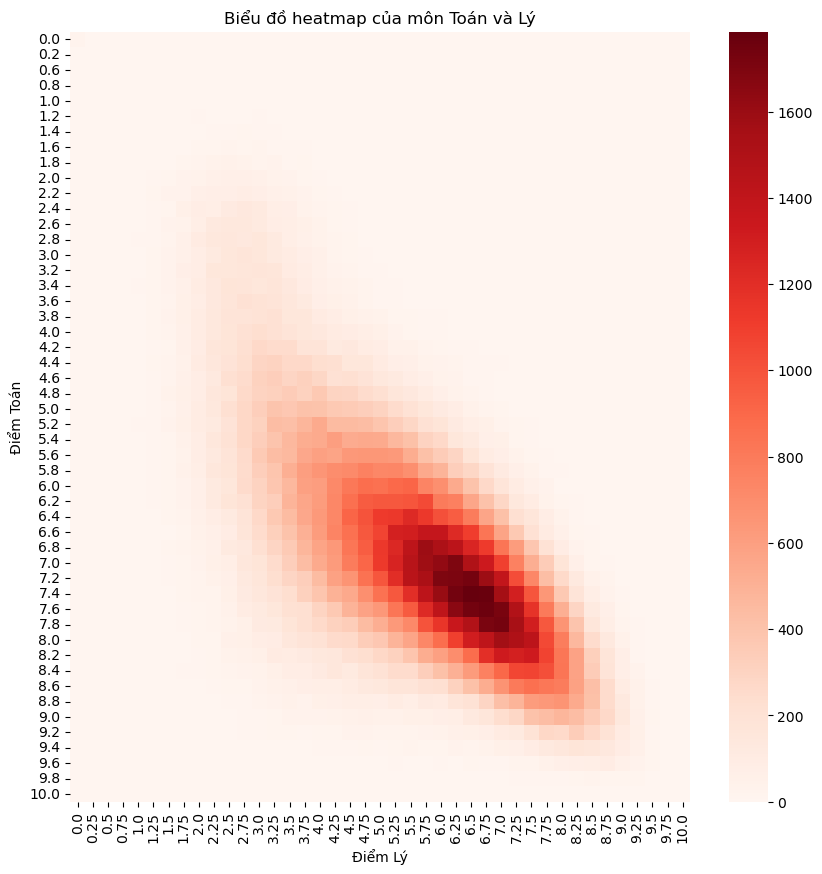

In [18]:
import seaborn as sns
pivot_table = pd.crosstab(df_Toan_ly['Toan'], df_Toan_ly['Li'])
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_table, annot=False, cmap="Reds")
plt.title('Biểu đồ heatmap của môn Toán và Lý')
plt.xlabel('Điểm Lý')
plt.ylabel('Điểm Toán')
plt.show()

#### 2.7:Chứng minh cho nhận định: Học sinh có điểm Văn dưới 4 thì điểm Toán cũng dưới 4

In [19]:
df_Toan_Van = df[~df['Toan'].isnull() & ~df['Van'].isnull()]
df_Toan_Van = df_Toan_Van.groupby('Van').agg(
    Diem_toan_trung_binh = ('Toan', 'mean'),
    Diem_toan_cao_nhat = ('Toan', 'max'),
    Diem_toan_thap_nhat = ('Toan', 'min'),
    So_thi_sinh = ('sbd', 'count')
).reset_index().round(2)
#df_Toan_Van.head(100)



#### Task 3: Perform summary calculations related to group of subjects

##### 3.1: Create data frame for subject "Tu nhien" only

In [20]:
df_A = df
df_A = df_A[df['To hop thi'] == 'Tu nhien']
df_A.drop(columns = ['Dia', 'GDCD', 'Su'], inplace = True)
df_A = df_A[df_A['Ma_mon_ngoai_ngu'] == 'N1']
df_A

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3160\4069756027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A.drop(columns = ['Dia', 'GDCD', 'Su'], inplace = True)


,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Toan,Van,sbd,To hop thi
1,4.50,8.25,N1,8.0,6.00,8.6,6.17,51000032,Tu nhien
5,5.75,7.50,N1,4.4,3.00,7.2,6.75,51000003,Tu nhien
8,3.50,5.50,N1,2.2,3.75,5.6,4.50,51000007,Tu nhien
14,5.00,7.00,N1,3.6,4.75,7.0,6.25,51000014,Tu nhien
15,6.75,8.00,N1,8.8,6.25,7.8,7.25,51000019,Tu nhien
...,...,...,...,...,...,...,...,...,...
811829,5.50,5.50,N1,2.8,3.75,6.6,4.00,26019082,Tu nhien
811839,4.50,5.25,N1,3.8,5.75,6.2,4.50,26019093,Tu nhien
811844,3.25,4.25,N1,3.2,5.50,5.4,5.75,26019100,Tu nhien
811847,4.50,3.75,N1,4.4,4.00,5.2,6.25,26019102,Tu nhien


##### 3.2: Create columns for each specific group subject

In [21]:
"""
A00: Toán, Vật lý, Hóa học
A01: Toán, Vật lý, Tiếng Anh

B00: Toán, Sinh học, Hóa học.
B01: Toán, Sinh học, Lịch sử
B02: Toán, Sinh học, Địa lý
B03: Toán, Sinh học, Ngữ văn.
B04: Toán, Sinh học, Giáo dục công dân.
B05: Toán, Sinh học, Khoa học xã hội.
B08: Toán, Sinh học, Tiếng Anh.
"""
# Xoa hang co may dua bo thi
df_A.dropna(subset = ['Ngoai_ngu', 'Hoa', 'Li', 'Sinh', 'Van', 'Toan'], inplace = True)
df_A['A00'] = df_A['Toan'] + df_A['Li'] + df_A['Hoa']
df_A['A01'] = df_A['Toan'] + df_A['Li'] + df_A['Ngoai_ngu']

df_A['B00'] = df_A['Toan'] + df_A['Sinh'] + df_A['Hoa']
df_A['B08'] = df_A['Toan'] + df_A['Sinh'] + df_A['Ngoai_ngu']
df_A.sort_values(by = 'A00', ascending = False)




,Hoa,Li,Ma_mon_ngoai_ngu,Ngoai_ngu,Sinh,Toan,Van,sbd,To hop thi,A00,A01,B00,B08
6355,10.00,9.25,N1,1.4,5.50,9.8,5.00,28028736,Tu nhien,29.05,20.45,25.30,16.70
656063,9.50,9.50,N1,9.0,7.00,9.8,7.00,28018525,Tu nhien,28.80,28.30,26.30,25.80
489147,9.75,9.25,N1,5.8,5.50,9.8,7.00,15000027,Tu nhien,28.80,24.85,25.05,21.10
346036,9.50,9.25,N1,8.8,4.25,10.0,2.75,01068360,Tu nhien,28.75,28.05,23.75,23.05
88483,9.50,9.50,N1,3.2,4.00,9.6,6.25,28015875,Tu nhien,28.60,22.30,23.10,16.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330962,1.75,1.50,N1,1.6,2.50,1.8,0.00,39007531,Tu nhien,5.05,4.90,6.05,5.90
592831,2.00,0.75,N1,2.2,3.50,2.0,5.50,28002357,Tu nhien,4.75,4.95,7.50,7.70
5927,2.25,1.25,N1,2.2,1.25,1.2,4.25,28028309,Tu nhien,4.70,4.65,4.70,4.65
80547,1.75,0.50,N1,2.6,2.00,2.0,4.00,53012309,Tu nhien,4.25,5.10,5.75,6.60
